# Timings plotting

In [6]:
%matplotlib inline

from typing import Dict
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass

@dataclass
class Results:
    name: str
    N: np.ndarray
    comp_t: np.ndarray
    offload_t: np.ndarray

In [42]:
# Define IT_NUM as number of iterations for the results
# The last line is results for N, mem_usage, mflops

# get the time averages for each N
# plot N vs time average for each iter

# Getting the data
names = [
    "mkn",
    "mnk",
    "blk"
]
results_files = [
    "./timings/timing_mkn_offload.txt",
    "./timings/timing_mnk_offload.txt",
    './timings/timing_blk_offload.txt'
]
IT_NUM = 10
results_dict:Dict[str,Results]=dict()
for name, file in zip(names,results_files):
    data = np.loadtxt(file, delimiter=',')
    res = Results(
        name=name,
        N = data[:,0],
        comp_t=data[:,1],
        offload_t=data[:,2]
    )
    results_dict[name] = res


# Getting the averages for each N
Ns = np.unique(results_dict['mkn'].N)

mkn_indices = np.where(results_dict['mkn'].N == 100)[0]

avg_dict:Dict[str,list]=dict()

for name in names:
    avg_dict[name] = []
    for N in Ns:
        res = results_dict[name]
        idxs = np.where(res.N == N)[0]
        comp_avg = res.comp_t[idxs].mean()
        avg_dict[name].append(comp_avg)
        

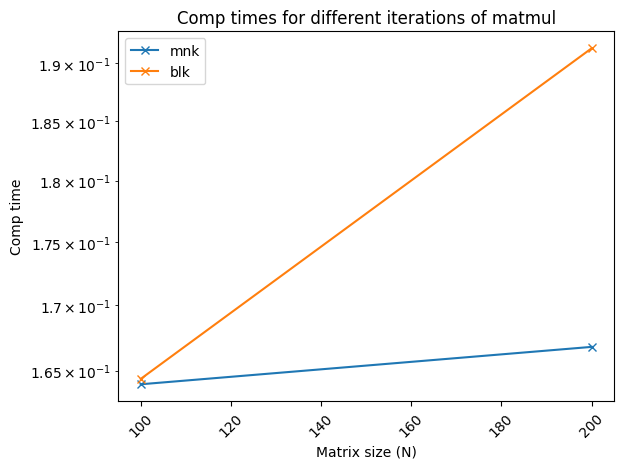

In [43]:
plt.figure()
plt.title("Comp times for different iterations of matmul")
for name, res in avg_dict.items():
    if name == 'mkn':
        continue
    plt.plot(Ns, res,"-x",label=name)

plt.legend()

# log scale for Y axis
plt.yscale('log', base=10)

# make the ticks on an angle
plt.xticks(rotation=45)

plt.xlabel('Matrix size (N)')
plt.ylabel('Comp time')

# plt.savefig("timings")
plt.show()



